In [1]:
# 새 책 !!!!! 한번에 끝내는~ p 124!!! 갸아아악 그치만 아직 20250228임~

# 판다스(pandas) 심화

## 데이터프레임 정렬

In [2]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {
        'col1':[2,1,9,8,7,4],
        'col2':['A','A','B', np.nan,'D','C'],
        'col3':[0,1,9,4,2,3]
       }
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [3]:
# index axis=0(행)을 축으로 정렬
df = df.sort_index(axis=0)  # 꼭 업데이트(스스로에 대입) 해줄 것~!
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [4]:
# index axis=1(열) 을 축으로 정렬, 내림차순(False)
df = df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [5]:
# sort_value
sorted_df1 = df.sort_values('col1',ascending=True)  # col1에 대하여 value를 정리하라~
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [6]:
# sort_value 2
sorted_df2 = df.sort_values(['col2','col1'],ascending=[True,False])
sorted_df2   # 같은 col2의 A 안에서 col1의 2가 우선된다 !!

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


In [7]:
# 🎸🚒어젯밤에  ~ 난🧑‍🚒 니가🎵 미워졌어~🚒🎶

## 데이터 분석용 함수

In [8]:
# 데이터 프레임의 index와 columns
import numpy as np
import pandas as pd
data ={
    'korean' :[50,60,70,30],
    'math':[30,np.nan,40,20]   # np.nan을 치면 np함수가 값을 넣어준다 !!
}
index =['a','b','c','d']
df = pd.DataFrame(data,index=index)
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')


,korean,math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [9]:
# count() 함수
print(df.count(axis=0))  # NaN은 값을 계산하지 않는다!! cf) axis = 0 기본값(생략가능)
print(df.count(axis=1))

korean    4
math      3
dtype: int64
a    2
b    1
c    2
d    2
dtype: int64


In [10]:
# max(), min(), sum(), mean()
print(df.max(),'\n')
print(df.max(axis=1),'\n',"="*25)
print(df.min(),'\n')
print(df.min(axis=1),'\n',"="*25)
print(df.sum(),'\n')
print(df.sum(axis=1),'\n',"="*25)
print(df.mean(),'\n')
print(df.mean(axis=1,skipna=False),'\n',"="*25) # NaN 값 보이게 하기
print(df.mean(axis=1,skipna=True),'\n',"="*25)  # 상황에 따라 결측값은 대체되는 것이 좋다! 

korean    70.0
math      40.0
dtype: float64 

a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64 
korean    30.0
math      20.0
dtype: float64 

a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64 
korean    210.0
math       90.0
dtype: float64 

a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64 
korean    52.5
math      30.0
dtype: float64 

a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64 
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64 


In [11]:
avg = df['math'].mean()
df['math']=df['math'].fillna(avg)
df  # 평균값을 은글슬쩍 대체해버렸어~

,korean,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


## 그룹으로 묶기 groupby

In [12]:
# SQL 할 때도 groupby가 있대~~

In [13]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data1':[1,2,3,1,2,3],
    'data2':[4,4,6,0,6,1],
    #'data3':['안녕','a','b','하세요','pple','..라도 맞고 싶어서']
})
print("DataFrame : ")
df

DataFrame : 


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [14]:
df.groupby('key').sum()  # A, B, C가 한 데 묶였다 !! o.m.g

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


+++++++++++++++++++++++++++++++++++

*만약 숫자 3이 있다면...*

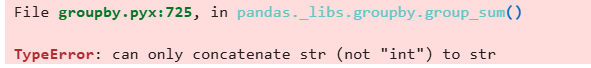
+++++++++++++++++++++++++++++++++++

In [15]:
df.groupby(['key','data1']).sum().reset_index()  # reset_index()로 정리해주는 것 잊지 말자~~!

,key,data1,data2
0,A,1,4
1,B,2,10
2,C,3,7


In [16]:
# 🎼A B C easiest~🎤 One two three a triplus🎶 do re mi A B C🎵that's what you baby you and me girl🎶 !

In [17]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [18]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [19]:
# 20250304 수업!!! 교재 p135!!

In [20]:
# filter 메서드
t = list(range(1,11))
result=[]
def is_even(x):
    return True if x%2==0 else False
for i in t:
    if is_even(i):
        result.append(i)
print(result)

[2, 4, 6, 8, 10]


In [21]:
# 파이썬에는 삼항연산자가 없다~

In [22]:
df

,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [23]:
df.groupby('key').mean() # 평균 !!

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [24]:
def filter_mean(x):   # 필터는 참인지 거짓인지 구분할 수 있도록 !!
    return x['data2'].mean()>3
df.groupby('key').filter(filter_mean)  # 매개변수에 함수도 들어갈 수 있음~
# filter_mean(df.groupby('key'))

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [25]:
df1 = df.groupby('key').get_group('A')
df2 = df.groupby('key').get_group('B')
df3 = df.groupby('key').get_group('C')

#데이터 프레임 이어 붙이기
df4 = pd.concat([df1, df3],axis=1)  # axis = 1 컬럼방향, 기본은 행방향 axis=0
df5 = pd.concat([df2, df3],axis=1)
df5
# #v평균값으로 채운다.
# mean = df2[data2].astype(int).mean()
# mean
# df5.fillna(method='ffill')  # 0으로 결측값을 채움

# #전후의 값으로 NaN값을 채운다.
# df5.ffill()
# df5.bfill()

,key,data1,data2,key,data1,data2
1,B,2.0,4.0,NaN,NaN,NaN
4,B,2.0,6.0,NaN,NaN,NaN
2,NaN,NaN,NaN,C,3.0,6.0
5,NaN,NaN,NaN,C,3.0,1.0


## 피봇과 피봇테이블

In [26]:
# 필요한 것을 꺼내는 것 !!

- groupby 세로형 데이터프레임 유지
- pivot, pivot_table 가로형 재결합, 재가공의 느낌

In [27]:
import pandas as pd
df = pd.DataFrame([
    ['20210901','A',1],
    ['20210901','B',10],
    ['20210901','C',100],
    ['20210902','A',2],
    ['20210902','B',20],
    ['20210902','C',200],
    ['20210903','A',3],
    ['20210903','B',30],
    ['20210903','C',300]
    
], columns = ['date', 'type','volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [28]:
pivot1 = df.pivot(index="date",columns='type', values="volume")
pivot1  # 데이터들이 한번 쏵 정리됨~!

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [29]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [30]:
pivot1.reset_index(level=0, inplace=True) # 원본을 대체한다!
pivot1

,date,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [32]:
# .set_index('응답') : 컬럼 하나를 인덱스로 지정
# .reset_index('') : 인덱스를 초기화

In [31]:
pivot1 = pivot1.set_index('date')
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


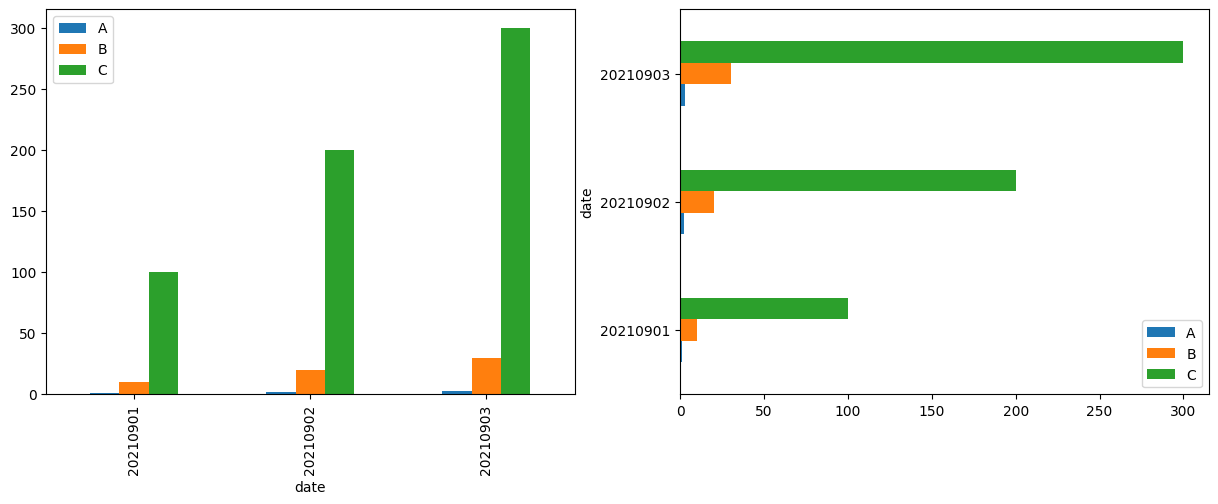

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(15,5))
pivot1.plot(kind='bar',ax=ax[0])
pivot1.plot(kind='barh',ax=ax[1])  # 바 그래프가 누워서 만들어짐 !!!!
plt.show()

In [45]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    '지역' : ['안동', '안동', '안동', '경기', '경기', '부산','서울','안동'],
    '요일' : ['월', '월', '수' ,'월', '화', '월', '목', '금'],
    '강수확률' : [80,70,90,10,20,30,40,80],
    '강수량' : [80,50,100,200,200,100,50,1000]
})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [51]:
pd.pivot_table(df, index='요일', columns='지역', aggfunc='max')  # aggfunc : 그 중의 큰 값을 골라라!

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금     NaN    NaN   NaN  1000.0   NaN   NaN   NaN  80.0
목     NaN    NaN  50.0     NaN   NaN   NaN  40.0   NaN
수     NaN    NaN   NaN   100.0   NaN   NaN   NaN  90.0
월   200.0  100.0   NaN    80.0  10.0  30.0   NaN  80.0
화   200.0    NaN   NaN     NaN  20.0   NaN   NaN   NaN

In [50]:
pd.pivot_table(df, index='요일', columns='지역', aggfunc='max').fillna('')
# aggfunc='sum'  같은 셀의 합계
# aggfunc='mean' 같은 셀의 평균 

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [53]:
data = {
    '도시' : ["서울","부산","서울","부산","대구","대구","대구"],
    '연도':[2022,2022,2023,2023,2022,2023,2023],
    '판매량':[100,80,120,90,70,60,0]
}
df = pd.DataFrame(data)
pivot=df.pivot_table(index="도시",columns="연도", values = "판매량", aggfunc="min", fill_value=0)
#df
pivot

연도,2022,2023
도시,,
대구,70,0
부산,80,90
서울,100,120


In [2]:
# 20250305 수업!!! 교재 p155

# 데이터 시각화(Matplotlib)

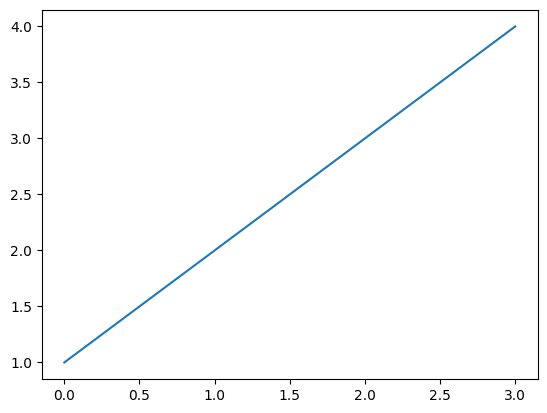

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.show()

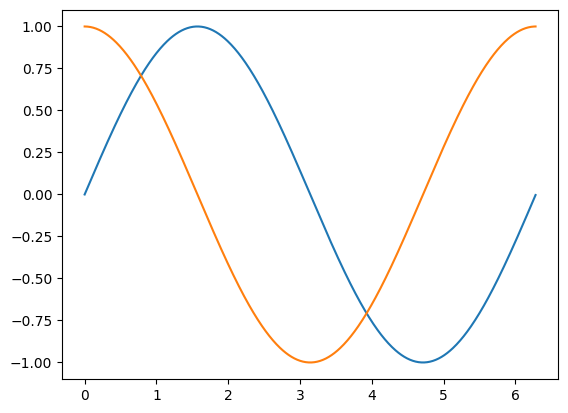

In [2]:
import numpy as np
x=np.arange(0,2*np.pi,0.01)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

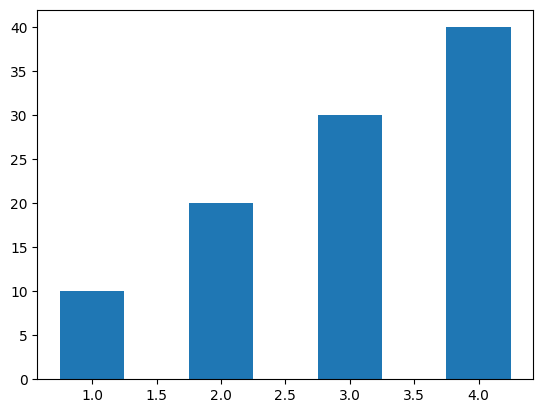

In [5]:
plt.bar([1,2,3,4],[10,20,30,40], width=0.5)
plt.show()

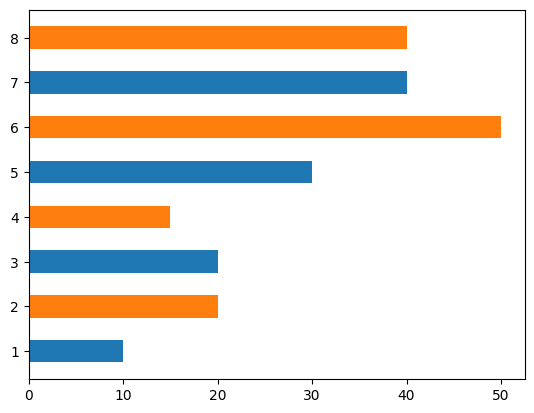

In [6]:
plt.barh(range(1,8,2),[10,20,30,40],height=0.5)
plt.barh(range(2,9,2),[20,15,50,40],height=0.5)
plt.show()

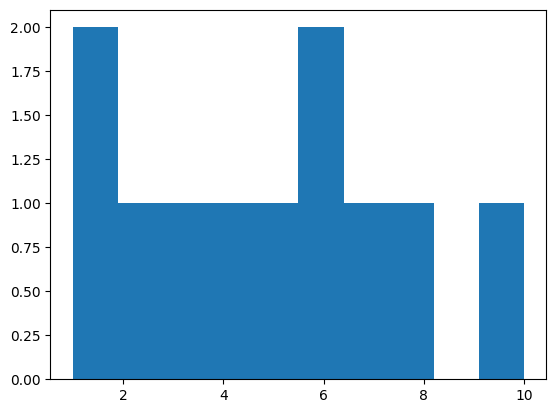

In [12]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10],bins=10)
plt.show()

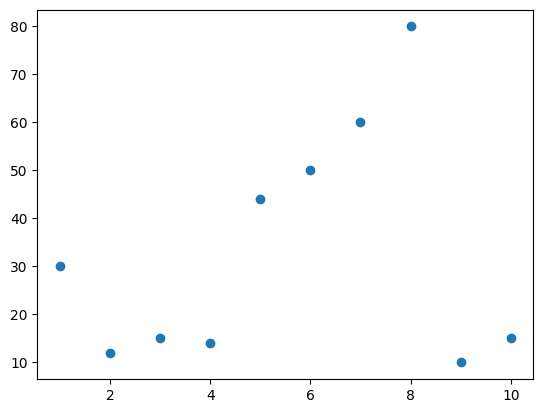

In [13]:
plt.scatter(range(1,11),[30,12,15,14,44,50,60,80,10,15])
plt.show()

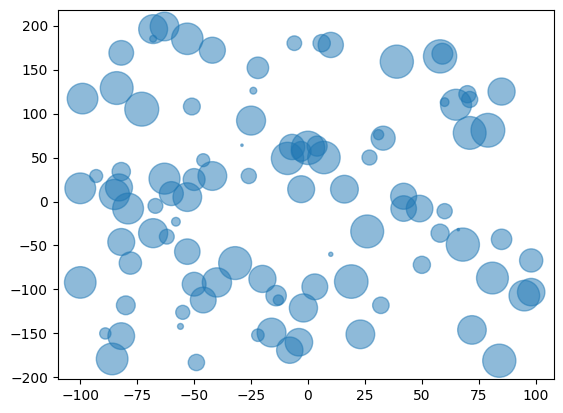

In [20]:
x = np.random.randint(-100,100,100)
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
plt.scatter(x,y,s=z*3,alpha=0.5)
plt.show()

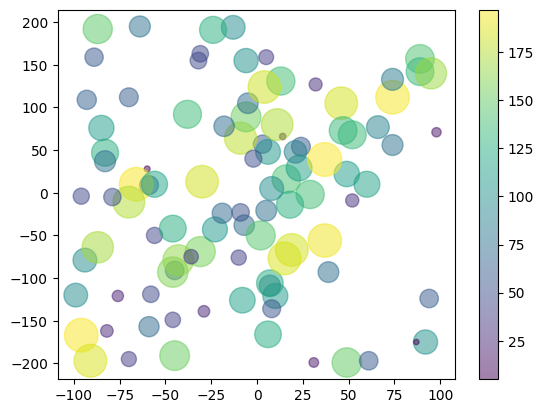

In [24]:
x = np.random.randint(-100,100,100)
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
# color = np.random.randint(0,100,100)
plt.scatter(x, y, s=z*3, c=z, alpha=0.5)
plt.colorbar()
plt.show()

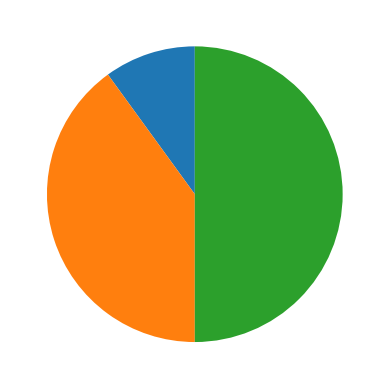

In [5]:
plt.pie([20,80,100],startangle=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


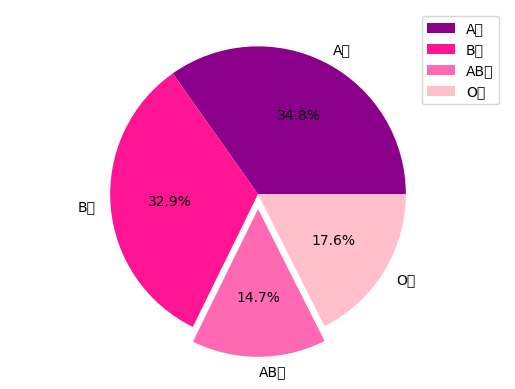

In [8]:
size = [2441,2312,1031,1233]
label =['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta','deeppink','hotpink','pink']
plt.axis('equal')
plt.pie(size, labels=label, autopct = '%.1f%%', explode =(0,0,0.1,0), colors=color)
plt.legend()
plt.show

In [9]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

NameError: name 'fm' is not defined

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm